In [1]:
# module import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

# 데이터 전처리
<a href='https://ifh.cc/v-vgvfGO' target='_blank'><img src='https://ifh.cc/g/vgvfGO.png' border='0'></a>

### 1. 법정동 코드 가공
  
- 법정동코드
- 시도명
- 시군구명
- 읍면동명
- 동리명
- 생성일자
- 말소일자  
  
법정동 코드 10자리 = 시도2자리+시군구3자리+읍면동3자리+리2자리

In [3]:
locCode = pd.read_excel('../dataset/법정동코드.xlsx')
locCode.head()

,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자
0,1100000000,서울특별시,NaN,NaN,NaN,19880423,NaN
1,1111000000,서울특별시,종로구,NaN,NaN,19880423,NaN
2,1111010100,서울특별시,종로구,청운동,NaN,19880423,NaN
3,1111010200,서울특별시,종로구,신교동,NaN,19880423,NaN
4,1111010300,서울특별시,종로구,궁정동,NaN,19880423,NaN


In [4]:
locCode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20556 entries, 0 to 20555
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   법정동코드   20556 non-null  int64  
 1   시도명     20556 non-null  object 
 2   시군구명    20387 non-null  object 
 3   읍면동명    20270 non-null  object 
 4   동리명     15222 non-null  object 
 5   생성일자    20556 non-null  int64  
 6   말소일자    0 non-null      float64
dtypes: float64(1), int64(2), object(4)
memory usage: 1.1+ MB


In [5]:
# 동리명이 NaN인 데이터 추출 > 동리명 제외
locCode = locCode[locCode["동리명"].isnull()==True]
locCode.head()

,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자
0,1100000000,서울특별시,NaN,NaN,NaN,19880423,NaN
1,1111000000,서울특별시,종로구,NaN,NaN,19880423,NaN
2,1111010100,서울특별시,종로구,청운동,NaN,19880423,NaN
3,1111010200,서울특별시,종로구,신교동,NaN,19880423,NaN
4,1111010300,서울특별시,종로구,궁정동,NaN,19880423,NaN


In [6]:
# 읍면동이 NaN이 아닌 데이터 추출
locCode = locCode[locCode["읍면동명"].isnull() == False]
locCode.head()

,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자
2,1111010100,서울특별시,종로구,청운동,NaN,19880423,NaN
3,1111010200,서울특별시,종로구,신교동,NaN,19880423,NaN
4,1111010300,서울특별시,종로구,궁정동,NaN,19880423,NaN
5,1111010400,서울특별시,종로구,효자동,NaN,19880423,NaN
6,1111010500,서울특별시,종로구,창성동,NaN,19880423,NaN


In [7]:
# 법정동 코드 컬럼에서 8자리를 추출하고 컬럼명을 'emd_c'로 설정
# 시도+시군구+읍면동 정보를 포함하도록!
# 예) 서울특별시 강남구 역삼동 > 11680101

locCode['emd_c'] = locCode["법정동코드"].astype(str).str[0:8].astype('int64')
locCode.head()

,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자,emd_c
2,1111010100,서울특별시,종로구,청운동,NaN,19880423,NaN,11110101
3,1111010200,서울특별시,종로구,신교동,NaN,19880423,NaN,11110102
4,1111010300,서울특별시,종로구,궁정동,NaN,19880423,NaN,11110103
5,1111010400,서울특별시,종로구,효자동,NaN,19880423,NaN,11110104
6,1111010500,서울특별시,종로구,창성동,NaN,19880423,NaN,11110105


In [8]:
# 시도명이 서울특별시인 데이터만 추출 후 시도명, 시군구명, 지역코드 컬럼만 추출 
loc = locCode[locCode['시도명']=='서울특별시'][['emd_c','시군구명','읍면동명']]
loc

,emd_c,시군구명,읍면동명
2,11110101,종로구,청운동
3,11110102,종로구,신교동
4,11110103,종로구,궁정동
5,11110104,종로구,효자동
6,11110105,종로구,창성동
...,...,...,...
488,11740106,강동구,둔촌동
489,11740107,강동구,암사동
490,11740108,강동구,성내동
491,11740109,강동구,천호동


In [9]:
# 서로 다른 컬럼명을 통일 시켜주자!
# 시군구명 --> gu
# 읍면동명 --> dong
loc.rename(columns = {'시군구명':'gu','읍면동명':'dong'}, inplace = True)
loc.head()

,emd_c,gu,dong
2,11110101,종로구,청운동
3,11110102,종로구,신교동
4,11110103,종로구,궁정동
5,11110104,종로구,효자동
6,11110105,종로구,창성동


### 2. 2019년 실거래가 데이터 가공
  
- 건축년도
- 거래년도
- 거래월
- 거래일자
- 법정동
- 거래금액
- 아파트이름
- 전용면적
- 지역코드
- 층
- 지번

In [10]:
apt_19 = pd.read_csv('../dataset/2019년 서울 아파트 실거래가.csv', encoding="cp949")
apt_19.head()

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번
0,2008,2019,1,7,사직동,"105,000",광화문풍림스페이스본(101동~105동),97.61,11110,10,9
1,2008,2019,1,11,사직동,"162,000",광화문풍림스페이스본(106동),163.33,11110,11,9-1
2,2008,2019,1,19,사직동,"119,000",광화문풍림스페이스본(101동~105동),131.44,11110,13,9
3,2008,2019,1,30,사직동,"119,000",광화문풍림스페이스본(101동~105동),147.31,11110,1,9
4,2004,2019,1,25,내수동,"160,000",경희궁의아침4단지,150.48,11110,14,73


In [11]:
# 결측치 확인
apt_19.isnull().sum()

건축년도     0
거래년도     0
거래월      0
거래일자     0
법정동      0
거래금액     0
아파트이름    0
전용면적     0
지역코드     0
층        0
지번       0
dtype: int64

In [12]:
apt_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68864 entries, 0 to 68863
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   건축년도    68864 non-null  int64  
 1   거래년도    68864 non-null  int64  
 2   거래월     68864 non-null  int64  
 3   거래일자    68864 non-null  int64  
 4   법정동     68864 non-null  object 
 5   거래금액    68864 non-null  object 
 6   아파트이름   68864 non-null  object 
 7   전용면적    68864 non-null  float64
 8   지역코드    68864 non-null  int64  
 9   층       68864 non-null  int64  
 10  지번      68864 non-null  object 
dtypes: float64(1), int64(6), object(4)
memory usage: 5.8+ MB


In [13]:
apt_19['거래금액'].unique()

# 거래금액 컬럼을 수치형으로 바꿔주기 전에 object로 인식된 이유를 찾기 위해 unique()로 조회
# 값의 앞에 공백이 포함되어 있으므로 공백제거 --> , 제거 --> 타입 변경 순으로 진행

array(['   105,000', '   162,000', '   119,000', ..., '   122,750',
       '   134,600', '    51,150'], dtype=object)

In [14]:
# 공백 제거
apt_19['거래금액'] = apt_19['거래금액'].str.strip()

In [15]:
# , 제거 & 타입 변경
apt_19['거래금액'] = apt_19['거래금액'].str.replace(',','').astype('int64')
apt_19.head()

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73


In [16]:
# 법정동 코드를 8자리 사용할 것이기 때문에 기존의 지역코드 컬럼을 제거
apt_19.drop('지역코드', axis = 1, inplace = True)
apt_19.head(1)

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,층,지번
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,10,9


In [17]:
### 법정동 코드 데이터와 법정동 컬럼을 기준으로 merge
# 두 데이터프레임 간 컬럼명을 맞춰주기 위해 컬럼명 변경
apt_19.rename(columns = {'법정동':'dong'}, inplace = True)

# dong 컬럼의 값 앞에 포함된 공백 제거
apt_19['dong'] = apt_19['dong'].str.strip()

# 행을 기준으로 데이터 합치기
apt_19_fin = pd.merge(apt_19, loc, on='dong')
apt_19_fin

,건축년도,거래년도,거래월,거래일자,dong,거래금액,아파트이름,전용면적,층,지번,emd_c,gu
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,10,9,11110115,종로구
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11,9-1,11110115,종로구
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,13,9,11110115,종로구
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,1,9,11110115,종로구
4,2008,2019,3,4,사직동,150000,광화문풍림스페이스본(101동~105동),158.99,7,9,11110115,종로구
...,...,...,...,...,...,...,...,...,...,...,...,...
70776,2011,2019,12,9,상일동,88000,고덕리엔파크3단지,84.96,9,490,11740103,강동구
70777,2018,2019,12,11,상일동,121000,고덕숲아이파크,84.97,6,515,11740103,강동구
70778,2011,2019,12,13,상일동,88000,고덕리엔파크3단지,84.98,16,490,11740103,강동구
70779,2011,2019,12,28,상일동,87500,고덕리엔파크3단지,84.98,8,490,11740103,강동구


### 3. 2021년 실거래가 데이터 가공
  
- 시군구
- 번지
- 본번
- 부번
- 단지명
- 전용면적(㎡)
- 계약년월
- 계약일
- 거래금액(만원)
- 층
- 건국년도
- 도로명
- 해제사유발생일
- 거래유형
- 중개사소재지

In [18]:
apt_21 = pd.read_csv('../dataset/2021년 서울 아파트 실거래가.csv', encoding="cp949")
apt_21.head()

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지
0,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),77.75,202104,15,"174,000",9,1988,언주로 103,NaN,-,-
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202105,15,"195,000",5,1987,언주로 3,NaN,-,-
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202108,11,"200,000",3,1987,언주로 3,NaN,-,-
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202109,2,"220,000",2,1987,언주로 3,NaN,-,-
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202112,4,"215,000",3,1987,언주로 3,NaN,중개거래,서울 강남구


In [19]:
apt_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43365 entries, 0 to 43364
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시군구       43365 non-null  object 
 1   번지        43351 non-null  object 
 2   본번        43360 non-null  float64
 3   부번        43360 non-null  float64
 4   단지명       43365 non-null  object 
 5   전용면적(㎡)   43365 non-null  float64
 6   계약년월      43365 non-null  int64  
 7   계약일       43365 non-null  int64  
 8   거래금액(만원)  43365 non-null  object 
 9   층         43365 non-null  int64  
 10  건축년도      43365 non-null  int64  
 11  도로명       43365 non-null  object 
 12  해제사유발생일   1362 non-null   float64
 13  거래유형      43365 non-null  object 
 14  중개사소재지    43365 non-null  object 
dtypes: float64(4), int64(4), object(7)
memory usage: 5.0+ MB


In [20]:
apt_21.isnull().sum() # 결측치 존재

시군구             0
번지             14
본번              5
부번              5
단지명             0
전용면적(㎡)         0
계약년월            0
계약일             0
거래금액(만원)        0
층               0
건축년도            0
도로명             0
해제사유발생일     42003
거래유형            0
중개사소재지          0
dtype: int64

#### 결측치 처리 전략 세우기
- '해제사유발생일' 컬럼의 경우 분석에 사용하지 않을 것이기 때문에 결측치 처리 하지 않고 컬럼을 drop한다
- '번지' 컬럼의 경우 결측치 외에도 잘못 입력된 값이 존재함 --> 때문에 번지 컬럼을 사용하지 않고 drop
- '본번'과 '부번' 컬럼의 내용을 합쳐서 apt_19 데이터프레임의 '지번'과 같은 정보를 담은 컬럼을 만들 수 있으므로 결측치의 내용 확인 후 채워넣는 전략 수립!

In [21]:
apt_21.loc[apt_21['본번'].isnull()]

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지
27658,서울특별시 서초구 신원동,NaN,NaN,NaN,힐스테이트 서초 젠트리스,84.95,202103,11,"163,000",2,2014,헌릉로8길 10-12,NaN,-,-
27659,서울특별시 서초구 신원동,NaN,NaN,NaN,힐스테이트 서초 젠트리스,101.90,202104,15,"187,500",4,2014,헌릉로8길 10-12,NaN,-,-
27660,서울특별시 서초구 신원동,NaN,NaN,NaN,힐스테이트 서초 젠트리스,101.90,202104,27,"184,500",3,2014,헌릉로8길 10-12,NaN,-,-
27661,서울특별시 서초구 신원동,NaN,NaN,NaN,힐스테이트 서초 젠트리스,84.95,202105,26,"165,000",4,2014,헌릉로8길 10-12,NaN,-,-
27662,서울특별시 서초구 신원동,NaN,NaN,NaN,힐스테이트 서초 젠트리스,84.99,202107,26,"182,000",7,2014,헌릉로8길 10-12,NaN,-,-


In [22]:
apt_21.loc[apt_21['부번'].isnull()]

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지
27658,서울특별시 서초구 신원동,NaN,NaN,NaN,힐스테이트 서초 젠트리스,84.95,202103,11,"163,000",2,2014,헌릉로8길 10-12,NaN,-,-
27659,서울특별시 서초구 신원동,NaN,NaN,NaN,힐스테이트 서초 젠트리스,101.90,202104,15,"187,500",4,2014,헌릉로8길 10-12,NaN,-,-
27660,서울특별시 서초구 신원동,NaN,NaN,NaN,힐스테이트 서초 젠트리스,101.90,202104,27,"184,500",3,2014,헌릉로8길 10-12,NaN,-,-
27661,서울특별시 서초구 신원동,NaN,NaN,NaN,힐스테이트 서초 젠트리스,84.95,202105,26,"165,000",4,2014,헌릉로8길 10-12,NaN,-,-
27662,서울특별시 서초구 신원동,NaN,NaN,NaN,힐스테이트 서초 젠트리스,84.99,202107,26,"182,000",7,2014,헌릉로8길 10-12,NaN,-,-


In [23]:
'''
본번과 부번 컬럼의 결측치가 눈으로 확인 가능할 만큼 적었기 떄문에 해당 내용을 loc을 사용해서 직접 확인

확인한 결과, 같은 지역에 대해 해당 내용이 없었기 때문에 검색을 통해 해당 지역의 본번과 부번을 확인하고 직접 채워 넣어줌
'''

apt_21['본번'].fillna(10, inplace=True)
apt_21['부번'].fillna(12, inplace=True)

apt_21.isnull().sum()

시군구             0
번지             14
본번              0
부번              0
단지명             0
전용면적(㎡)         0
계약년월            0
계약일             0
거래금액(만원)        0
층               0
건축년도            0
도로명             0
해제사유발생일     42003
거래유형            0
중개사소재지          0
dtype: int64

In [24]:
# 불필요한 컬럼 정리하기!
## ['시군구', '본번', '부번', '단지명', '전용면적', '계약년월', '계약일', '거래금액', '층', '건축년도' ]를 제외한 컬럼 제거
col = ['번지', '도로명', '해제사유발생일', '거래유형', '중개사소재지']
apt_21.drop(col, axis = 1, inplace = True)
apt_21.head()

,시군구,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도
0,서울특별시 강남구 개포동,655.0,2.0,개포2차현대아파트(220),77.75,202104,15,"174,000",9,1988
1,서울특별시 강남구 개포동,658.0,1.0,개포6차우성아파트1동~8동,79.97,202105,15,"195,000",5,1987
2,서울특별시 강남구 개포동,658.0,1.0,개포6차우성아파트1동~8동,79.97,202108,11,"200,000",3,1987
3,서울특별시 강남구 개포동,658.0,1.0,개포6차우성아파트1동~8동,79.97,202109,2,"220,000",2,1987
4,서울특별시 강남구 개포동,658.0,1.0,개포6차우성아파트1동~8동,79.97,202112,4,"215,000",3,1987


In [25]:
# 본번과 부번의 타입을 object로 변경
apt_21['본번'] = apt_21['본번'].astype('int')
apt_21['부번'] = apt_21['부번'].astype('int')
apt_21.head()

apt_21['본번'] = apt_21['본번'].astype('str')
apt_21['부번'] = apt_21['부번'].astype('str')

apt_21['지번'] = np.where(apt_21['부번'] == 0, apt_21['본번'], (apt_21['본번'] + '-' + apt_21['부번']))
apt_21.head()

,시군구,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,지번
0,서울특별시 강남구 개포동,655,2,개포2차현대아파트(220),77.75,202104,15,"174,000",9,1988,655-2
1,서울특별시 강남구 개포동,658,1,개포6차우성아파트1동~8동,79.97,202105,15,"195,000",5,1987,658-1
2,서울특별시 강남구 개포동,658,1,개포6차우성아파트1동~8동,79.97,202108,11,"200,000",3,1987,658-1
3,서울특별시 강남구 개포동,658,1,개포6차우성아파트1동~8동,79.97,202109,2,"220,000",2,1987,658-1
4,서울특별시 강남구 개포동,658,1,개포6차우성아파트1동~8동,79.97,202112,4,"215,000",3,1987,658-1


In [26]:
# 필요없어진 본번과 부번 컬럼을 제거
apt_21.drop(['본번', '부번'],axis = 1, inplace = True)
apt_21.head(3)

,시군구,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,지번
0,서울특별시 강남구 개포동,개포2차현대아파트(220),77.75,202104,15,"174,000",9,1988,655-2
1,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,202105,15,"195,000",5,1987,658-1
2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,202108,11,"200,000",3,1987,658-1


In [27]:
# 시군구 컬럼을 split()해서 2개의 새로운 컬럼 생성
apt_21['gu'] = apt_21['시군구'].str.split(' ').str[1]
apt_21['dong'] = apt_21['시군구'].str.split(' ').str[2]

# 불필요해진 시군구 컬럼 제거
apt_21.drop('시군구', axis=1, inplace = True)
apt_21.head()

,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,지번,gu,dong
0,개포2차현대아파트(220),77.75,202104,15,"174,000",9,1988,655-2,강남구,개포동
1,개포6차우성아파트1동~8동,79.97,202105,15,"195,000",5,1987,658-1,강남구,개포동
2,개포6차우성아파트1동~8동,79.97,202108,11,"200,000",3,1987,658-1,강남구,개포동
3,개포6차우성아파트1동~8동,79.97,202109,2,"220,000",2,1987,658-1,강남구,개포동
4,개포6차우성아파트1동~8동,79.97,202112,4,"215,000",3,1987,658-1,강남구,개포동


In [28]:
# 계약년월 컬럼을 split해서 '거래년도'와 '거래월' 컬럼 생성
apt_21['계약년월'] = apt_21['계약년월'].astype('str')

apt_21['거래년도'] =  apt_21['계약년월'].str[:4] 
apt_21['거래월'] = apt_21['계약년월'].str[4:6]

# 불필요해진 '계약년월' 컬럼 제거
apt_21.drop(['계약년월'], axis=1, inplace=True)
apt_21.head(3)

,단지명,전용면적(㎡),계약일,거래금액(만원),층,건축년도,지번,gu,dong,거래년도,거래월
0,개포2차현대아파트(220),77.75,15,"174,000",9,1988,655-2,강남구,개포동,2021,04
1,개포6차우성아파트1동~8동,79.97,15,"195,000",5,1987,658-1,강남구,개포동,2021,05
2,개포6차우성아파트1동~8동,79.97,11,"200,000",3,1987,658-1,강남구,개포동,2021,08


In [29]:
apt_21.head()

,단지명,전용면적(㎡),계약일,거래금액(만원),층,건축년도,지번,gu,dong,거래년도,거래월
0,개포2차현대아파트(220),77.75,15,"174,000",9,1988,655-2,강남구,개포동,2021,04
1,개포6차우성아파트1동~8동,79.97,15,"195,000",5,1987,658-1,강남구,개포동,2021,05
2,개포6차우성아파트1동~8동,79.97,11,"200,000",3,1987,658-1,강남구,개포동,2021,08
3,개포6차우성아파트1동~8동,79.97,2,"220,000",2,1987,658-1,강남구,개포동,2021,09
4,개포6차우성아파트1동~8동,79.97,4,"215,000",3,1987,658-1,강남구,개포동,2021,12


In [30]:
# 거래금액 컬럼의 콤마(,) 제거 후 데이터 타입 변경
apt_21['거래금액'] = apt_21['거래금액(만원)'].str.replace(',','').astype('int64')

apt_21.drop(['거래금액(만원)'], axis=1, inplace=True)
apt_21.head()

,단지명,전용면적(㎡),계약일,층,건축년도,지번,gu,dong,거래년도,거래월,거래금액
0,개포2차현대아파트(220),77.75,15,9,1988,655-2,강남구,개포동,2021,04,174000
1,개포6차우성아파트1동~8동,79.97,15,5,1987,658-1,강남구,개포동,2021,05,195000
2,개포6차우성아파트1동~8동,79.97,11,3,1987,658-1,강남구,개포동,2021,08,200000
3,개포6차우성아파트1동~8동,79.97,2,2,1987,658-1,강남구,개포동,2021,09,220000
4,개포6차우성아파트1동~8동,79.97,4,3,1987,658-1,강남구,개포동,2021,12,215000


In [31]:
apt_19_fin.columns

Index(['건축년도', '거래년도', '거래월', '거래일자', 'dong', '거래금액', '아파트이름', '전용면적', '층',
       '지번', 'emd_c', 'gu'],
      dtype='object')

In [32]:
# merge를 위해 서로 다른 컬럼명을 apt_19를 기준으로 맞춰 준다
apt_21.rename(columns = {'계약일':'거래일자', '단지명':'아파트이름', '전용면적(㎡)':'전용면적'}, inplace = True)
apt_21.head(3)

,아파트이름,전용면적,거래일자,층,건축년도,지번,gu,dong,거래년도,거래월,거래금액
0,개포2차현대아파트(220),77.75,15,9,1988,655-2,강남구,개포동,2021,04,174000
1,개포6차우성아파트1동~8동,79.97,15,5,1987,658-1,강남구,개포동,2021,05,195000
2,개포6차우성아파트1동~8동,79.97,11,3,1987,658-1,강남구,개포동,2021,08,200000


In [33]:
apt_21_fin = pd.merge(apt_21, loc, on=['gu','dong'])
apt_21_fin

,아파트이름,전용면적,거래일자,층,건축년도,지번,gu,dong,거래년도,거래월,거래금액,emd_c
0,개포2차현대아파트(220),77.75,15,9,1988,655-2,강남구,개포동,2021,04,174000,11680103
1,개포6차우성아파트1동~8동,79.97,15,5,1987,658-1,강남구,개포동,2021,05,195000,11680103
2,개포6차우성아파트1동~8동,79.97,11,3,1987,658-1,강남구,개포동,2021,08,200000,11680103
3,개포6차우성아파트1동~8동,79.97,2,2,1987,658-1,강남구,개포동,2021,09,220000,11680103
4,개포6차우성아파트1동~8동,79.97,4,3,1987,658-1,강남구,개포동,2021,12,215000,11680103
...,...,...,...,...,...,...,...,...,...,...,...,...
43360,한영(101),57.66,27,5,2003,274-51,중랑구,중화동,2021,02,30500,11260103
43361,한영(101),84.69,4,2,2003,274-51,중랑구,중화동,2021,11,50000,11260103
43362,한영(102),72.22,4,4,2003,274-75,중랑구,중화동,2021,05,49500,11260103
43363,한영(103),58.46,1,2,2003,274-76,중랑구,중화동,2021,07,30000,11260103


### 4. 전처리 후 하나의 완성된 데이터프레임 생성

In [34]:
df = pd.concat([apt_19_fin, apt_21_fin]).reset_index(drop=True)
df

,건축년도,거래년도,거래월,거래일자,dong,거래금액,아파트이름,전용면적,층,지번,emd_c,gu
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,10,9,11110115,종로구
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11,9-1,11110115,종로구
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,13,9,11110115,종로구
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,1,9,11110115,종로구
4,2008,2019,3,4,사직동,150000,광화문풍림스페이스본(101동~105동),158.99,7,9,11110115,종로구
...,...,...,...,...,...,...,...,...,...,...,...,...
114141,2003,2021,02,27,중화동,30500,한영(101),57.66,5,274-51,11260103,중랑구
114142,2003,2021,11,4,중화동,50000,한영(101),84.69,2,274-51,11260103,중랑구
114143,2003,2021,05,4,중화동,49500,한영(102),72.22,4,274-75,11260103,중랑구
114144,2003,2021,07,1,중화동,30000,한영(103),58.46,2,274-76,11260103,중랑구


# 데이터 분석

### 데이터 파악

실거래가가 높은 지역과 낮은 지역 파악하기


`2021년도 평균 실거래가 top5`

In [71]:
temp1 = df.loc[df['거래년도'] == '2021'].groupby(['거래년도', 'gu'])['거래금액'].mean().reset_index(name='mean').sort_values(['mean'], ascending=False).head(5)
temp1

,거래년도,gu,mean
0,2021,강남구,207051.757251
14,2021,서초구,204859.021958
20,2021,용산구,199079.174586
17,2021,송파구,154369.248473
15,2021,성동구,144537.895778


`2019년도 평균 실거래가 top5`

In [72]:
temp2 = df.loc[df['거래년도'] == 2019].groupby(['거래년도', 'gu'])['거래금액'].mean().reset_index(name='mean').sort_values(['mean'], ascending=False).head(5)
temp2

,거래년도,gu,mean
0,2019,강남구,172963.501094
14,2019,서초구,165753.553784
20,2019,용산구,153938.597242
17,2019,송파구,120263.642261
15,2019,성동구,96172.018072


`2021년도 평균 실거래가 bottom5`

In [73]:
temp3 = df.loc[df['거래년도'] == '2021'].groupby(['거래년도', 'gu'])['거래금액'].mean().reset_index(name='mean').sort_values(['mean']).head(5)
temp3

,거래년도,gu,mean
9,2021,도봉구,58488.159894
7,2021,금천구,59569.069767
6,2021,구로구,61995.496974
24,2021,중랑구,64459.750911
2,2021,강북구,66961.106223


`2019년도 평균 실거래가 bottom5`

In [74]:
temp4 = df.loc[df['거래년도'] == 2019].groupby(['거래년도', 'gu'])['거래금액'].mean().reset_index(name='mean').sort_values(['mean']).head(5)
temp4

,거래년도,gu,mean
9,2019,도봉구,40032.847906
7,2019,금천구,43253.850559
8,2019,노원구,43992.321718
24,2019,중랑구,44128.975429
2,2019,강북구,46512.156040


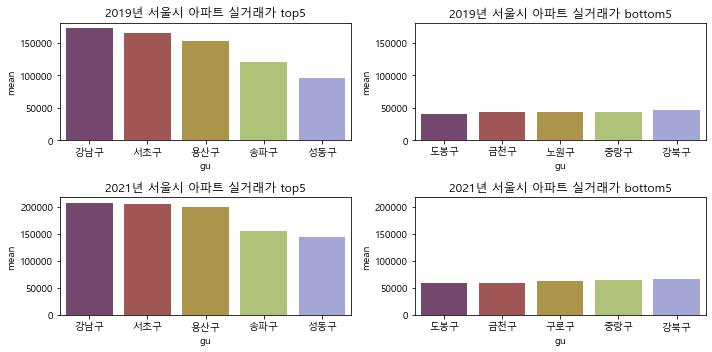

In [83]:
plt.figure(figsize = (10, 5))
a = plt.subplot(2,2,1)
sns.barplot(
    data= temp2,
    x= "gu",
    y= "mean", palette='tab20b_r')
plt.title('2019년 서울시 아파트 실거래가 top5')

b = plt.subplot(2,2,3)
sns.barplot(
    data= temp1,
    x= "gu",
    y= "mean", palette='tab20b_r')
plt.title('2021년 서울시 아파트 실거래가 top5')

c = plt.subplot(2,2,2, sharey = a)
sns.barplot(
    data= temp4,
    x= "gu",
    y= "mean", palette='tab20b_r')
plt.title('2019년 서울시 아파트 실거래가 bottom5')

d = plt.subplot(2,2,4 , sharey = b)
sns.barplot(
    data= temp3,
    x= "gu",
    y= "mean", palette='tab20b_r')
plt.title('2021년 서울시 아파트 실거래가 bottom5')
a.get_shared_y_axes().join(a, c)
plt.tight_layout()
plt.show()

2019년과 2021년의 실거래가 상위 5개 지역을 보면 순위 변동없이 강남구, 서초구, 용산구, 송파구, 성동구가 가장 높은 실거래가를 기록하고 있다.  
반면, 실거래가 하위 5곳을 살펴보면 나머지 순위 지역의 변화는 없지만, 3위였던 노원구가 순위 밖으로 밀려나고 구로구가 새롭게 등장했음을 확인할 수 있다.

그렇다면 상/하위 지역의 평균 실거래가 상승률은 어떨까?  
상위 지역들이 실거래가 상승률 또한 높을지 알아보자!  
  
  
    
      
      






`2019년 대비 2021년 top5 평균 실거래가 증감액 및 증가율`

In [40]:
top5 = pd.DataFrame(temp1['gu'])

top5['증감액'] = (temp1['mean'] - temp2['mean']).round(2)
top5['증가율'] = ((temp1['mean'] - temp2['mean'])/temp2['mean'] *100).round(2)
top5

,gu,증감액,증가율
0,강남구,34088.26,19.71
14,서초구,39105.47,23.59
20,용산구,45140.58,29.32
17,송파구,34105.61,28.36
15,성동구,48365.88,50.29


`2019년 대비 2021년 bottom5 평균 실거래가 증감액 및 증가율`

In [41]:
temp3 = df.loc[df['거래년도'] == '2021'].groupby(['거래년도', 'gu'])['거래금액'].mean().reset_index(name='mean').sort_values(['mean']).head(6)
temp3

,거래년도,gu,mean
9,2021,도봉구,58488.159894
7,2021,금천구,59569.069767
6,2021,구로구,61995.496974
24,2021,중랑구,64459.750911
2,2021,강북구,66961.106223
8,2021,노원구,67260.786559


In [42]:
temp4 = df.loc[df['거래년도'] == 2019].groupby(['거래년도', 'gu'])['거래금액'].mean().reset_index(name='mean').sort_values(['mean']).head(6)
temp4

,거래년도,gu,mean
9,2019,도봉구,40032.847906
7,2019,금천구,43253.850559
8,2019,노원구,43992.321718
24,2019,중랑구,44128.975429
2,2019,강북구,46512.156040
6,2019,구로구,50860.524213


In [43]:
bottom5 = pd.DataFrame(temp3['gu'])

bottom5['증감액'] = (temp3['mean'] - temp4['mean']).round(2)
bottom5['증가율'] = ((temp3['mean'] - temp4['mean'])/temp4['mean'] *100).round(2)
bottom5

,gu,증감액,증가율
9,도봉구,18455.31,46.10
7,금천구,16315.22,37.72
6,구로구,11134.97,21.89
24,중랑구,20330.78,46.07
2,강북구,20448.95,43.96
8,노원구,23268.46,52.89


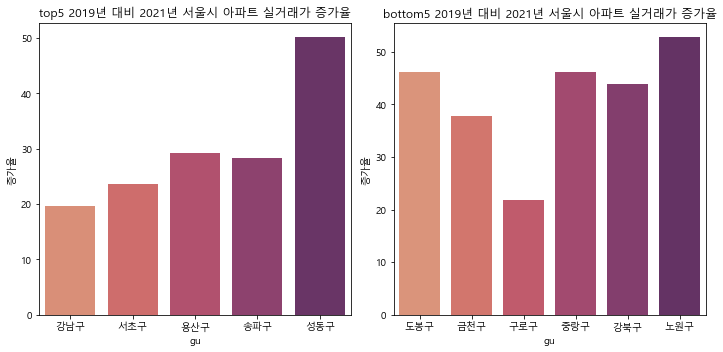

In [44]:

plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.barplot(
    data= top5,
    x= "gu",
    y= "증가율", palette='flare')
plt.title('top5 2019년 대비 2021년 서울시 아파트 실거래가 증가율')

plt.subplot(1,2,2)
sns.barplot(
    data= bottom5,
    x= "gu",
    y= "증가율", palette='flare')
plt.title('bottom5 2019년 대비 2021년 서울시 아파트 실거래가 증가율')

plt.tight_layout()
plt.show()

In [45]:
temp5 = df.loc[df['거래년도'] == '2021'].groupby(['거래년도', 'gu'])['거래금액'].mean().reset_index(name='mean')

In [46]:
temp6 = df.loc[df['거래년도'] == 2019].groupby(['거래년도', 'gu'])['거래금액'].mean().reset_index(name='mean')

In [47]:
df_up = pd.DataFrame(temp5['gu'])
df_up['증감액']= temp5['mean'] - temp6['mean']
df_up['증가율'] = ((temp5['mean'] - temp6['mean'])/temp6['mean'] *100).round(2)
df_up = df_up.sort_values('증가율', ascending = False).head(5)

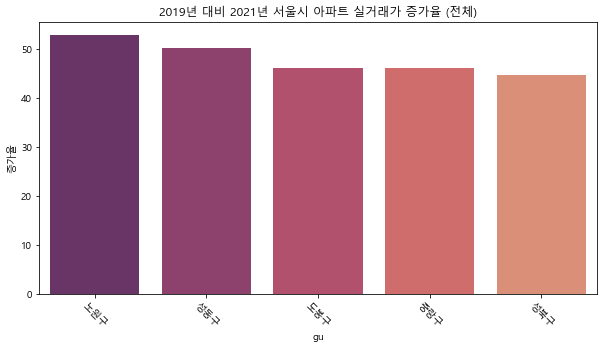

In [48]:
plt.figure(figsize = (10,5))
plt.xticks(rotation = - 45 )
sns.barplot(x = df_up['gu'], y = df_up['증가율'],
            palette= 'flare_r')

plt.title('2019년 대비 2021년 서울시 아파트 실거래가 증가율 (전체)')
plt.show()

성동구는 2019년, 2021년 모두 평균 실거래가 top5안에 들었음에도 불구하고 증가율 부문에서 top2이다. 이미 높은 가격이 형성되어 있으면 대부분 증가율이 높지 않기에 성동구에 대해서 더 알아보기로 하였다.



`2019년 성동구 내의 동 평균 실거래가`

In [49]:
temp7 = df.loc[(df['gu'] =='성동구') & (df['거래년도'] ==2019)].groupby(['거래년도', 'dong'])['거래금액'].mean().reset_index(name='mean')
temp7.sort_values('mean', ascending = False)

,거래년도,dong,mean
8,2019,성수동1가,124799.152542
11,2019,옥수동,119083.022222
7,2019,상왕십리동,115692.682927
9,2019,성수동2가,107820.967742
1,2019,금호동2가,103512.142857
3,2019,금호동4가,103457.105263
14,2019,하왕십리동,93248.229572
15,2019,행당동,86843.300971
2,2019,금호동3가,82057.627119
13,2019,응봉동,81959.158416


`2021년 성동구 내의 동 평균 실거래가`

In [50]:
temp8 = df.loc[(df['gu'] =='성동구') & (df['거래년도'] =='2021')].groupby(['거래년도', 'dong'])['거래금액'].mean().reset_index(name='mean')
temp8.sort_values('mean', ascending = False)

,거래년도,dong,mean
8,2021,성수동1가,236090.178571
11,2021,옥수동,163369.553073
9,2021,성수동2가,154867.567568
3,2021,금호동4가,152794.578313
1,2021,금호동2가,146959.770115
0,2021,금호동1가,145560.919540
7,2021,상왕십리동,133488.888889
15,2021,행당동,131944.561404
14,2021,하왕십리동,122188.325991
13,2021,응봉동,121233.980583


`2019년 대비 2021년 성동구 내 동 평균 실거래가 증감액 및 증가율`

In [51]:
sd_21= df.loc[(df['gu'] =='성동구') & (df['거래년도'] =='2021')].groupby(['거래년도', 'dong'])['거래금액'].mean().reset_index(name='mean').sort_values(['mean'], ascending = False)

In [52]:
sd_19= df.loc[(df['gu'] =='성동구') & (df['거래년도'] ==2019)].groupby(['거래년도', 'dong'])['거래금액'].mean().reset_index(name='mean').sort_values(['mean'], ascending = False)

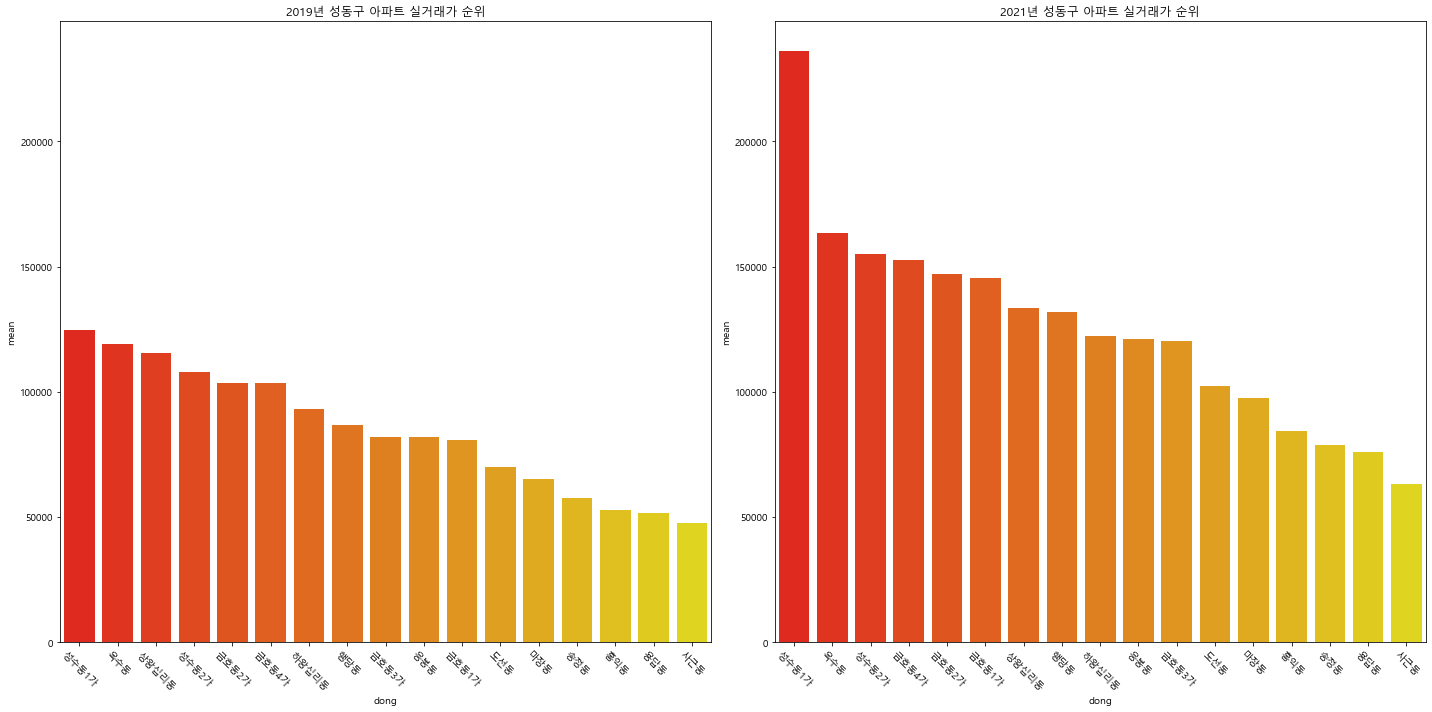

In [53]:
plt.figure(figsize = (20,10))
#plt.xticks(rotation = -45 )

a = plt.subplot(1,2,1)
plt.xticks(rotation = - 45 )
sns.barplot(
    data= sd_19,
    x= "dong",
    y= "mean", palette='autumn')
plt.title('2019년 성동구 아파트 실거래가 순위')



b = plt.subplot(1,2,2, sharey = a)
plt.xticks(rotation = - 45 )
sns.barplot(
    data= sd_21,
    x= "dong",
    y= "mean", palette='autumn')
plt.title('2021년 성동구 아파트 실거래가 순위')


a.get_shared_y_axes().join(a, b)

plt.tight_layout()
plt.show()


In [54]:
temp0 = df.loc[(df['gu'] =='성동구') & (df['거래년도'] ==2019)].groupby(['거래년도', 'dong'])['거래금액'].mean().reset_index(name='mean').sort_values(['mean'], ascending = False)

In [55]:
df_ss = pd.DataFrame(temp0['dong'])
df_ss['증감액']= temp8['mean'] - temp7['mean']
df_ss['증가율'] = ((temp8['mean'] - temp7['mean'])/temp7['mean'] *100).round(2)
df_ss = df_ss.sort_values(by= '증가율', ascending = False).head(5)
df_ss

,dong,증감액,증가율
8,성수동1가,111291.026029,89.18
0,금호동1가,64644.906468,79.89
16,홍익동,31535.000000,59.54
15,행당동,45101.260433,51.93
5,마장동,32156.557471,49.29


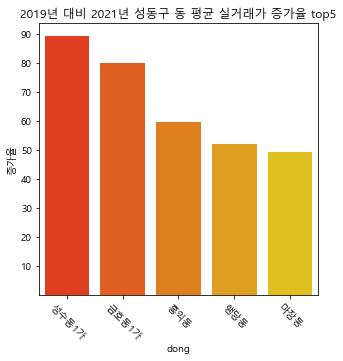

In [56]:
plt.figure(figsize = (5,5))
plt.xticks(rotation = - 45 )
plt.yticks([10, 20, 30, 40, 50, 60, 70, 80, 90])
sns.barplot(x = df_ss['dong'], y = df_ss['증가율'],
            palette= 'autumn')

plt.title('2019년 대비 2021년 성동구 동 평균 실거래가 증가율 top5')
plt.show()

그래프를 보면 알 수 있듯이 성수동1가의 증가율은 90%에 육박한다.  

이러한 천문학적인 수치가 나올 수 있는 이유를 찾기 위해 성수동1가의 아파트를 분석해봤다.

In [57]:
cond1 = (df['gu'] == '성동구')
cond2 = (df['dong'] == '성수동1가')
cond3 = (df['거래년도'] == 2019)
cond4 = (df['거래년도'] == '2021')


sungsu_2021 = df.loc[cond1 & cond2 & cond4].groupby('아파트이름').mean()[['거래금액']].sort_values('거래금액', ascending = False).reset_index().head(10)
sungsu_2021

,아파트이름,거래금액
0,갤러리아포레,537461.538462
1,아크로서울포레스트,520181.818182
2,트리마제,301097.560976
3,LIG건영,186442.857143
4,동아,169875.000000
5,한진타운,152500.000000
6,현대,139083.333333
7,서울숲대림,139071.428571
8,대우2,137750.000000
9,현대그린,132642.857143


In [58]:
sungsu_2019 = df.loc[cond1 & cond2 & cond3].groupby('아파트이름').mean()[['거래금액']].sort_values('거래금액', ascending = False).reset_index().head(10)
sungsu_2019

,아파트이름,거래금액
0,갤러리아 포레,405062.500000
1,트리마제,242187.500000
2,강변동양,145833.333333
3,LIG건영,130882.352941
4,중앙하이츠빌,111458.333333
5,신장미,110400.000000
6,동아,107293.750000
7,대림로즈빌,97413.333333
8,한진타운,96446.666667
9,금호,95500.000000


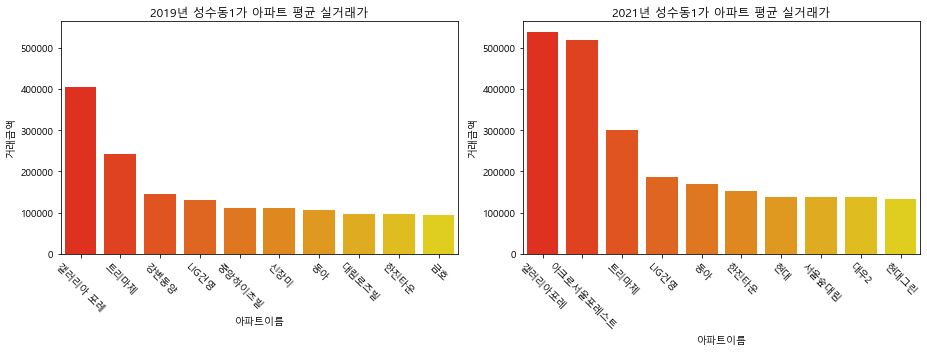

In [59]:
plt.figure(figsize = (13,5))
a = plt.subplot(1,2,1)
plt.xticks(rotation = - 45 )
sns.barplot(x = sungsu_2019['아파트이름'], y = sungsu_2019['거래금액'],
            palette= 'autumn')
plt.title('2019년 성수동1가 아파트 평균 실거래가')


plt.subplot(1,2,2, sharey = a)
plt.xticks(rotation = - 45 )
sns.barplot(x = sungsu_2021['아파트이름'], y = sungsu_2021['거래금액'],
            palette= 'autumn')
plt.title('2021년 성수동1가 아파트 평균 실거래가')


plt.tight_layout()
plt.show()

데이터를 통해 분석해본 결과 89.18%라는 천문학적인 수치가 나올 수 있던 두 가지 큰 이유는  
부동산 정책으로 인한 집값 상승과 2020년 준공된 '아크로 서울 포레스트'의 매매라고 볼 수 있다. (약 50억 이상 반영되었다.)
  
결론적으로 고액의 신축 아파트의 매매가 성동구가 평균 실거래가 top5와 평균 실거래가 top5 안에 선정 된 이유라고 분석할 수 있다. 

In [60]:
count_gu=df.loc[df['거래년도']==2019].groupby(['gu'])[['거래금액']].count().sort_values('거래금액', ascending = False)
count_gu = count_gu.reset_index()
count_gu
df_up = pd.DataFrame(temp5['gu'])
df_up['증감액']= temp5['mean'] - temp6['mean']
df_up['증가율'] = ((temp5['mean'] - temp6['mean'])/temp6['mean'] *100).round(2)
df_up = df_up.sort_values('증가율', ascending = False)
rise1 = df_up.sort_values(by = '증가율', ascending = False)
rise1.reset_index()
rise1
find_rel = pd.merge(count_gu, rise1, left_on = 'gu', right_on = 'gu')
find_rel.rename(columns = {'거래금액':'거래횟수'}, inplace = True)


---
노원구가 2021년에 실거래가 하위 5위를 벗어날 수 있었던 이유를 살펴보자.
먼저, 노원구는 2021년 서울 특별시 전체 아파트 거래량 1위를 차지하였다.

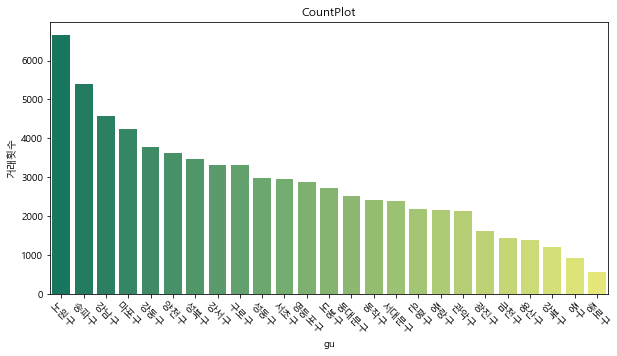

In [61]:
plt.figure(figsize = (10,5))
plt.xticks(rotation = - 45 )
sns.barplot(x = find_rel['gu'], y =find_rel['거래횟수'],
            palette= 'summer')

plt.title('CountPlot')
plt.show()

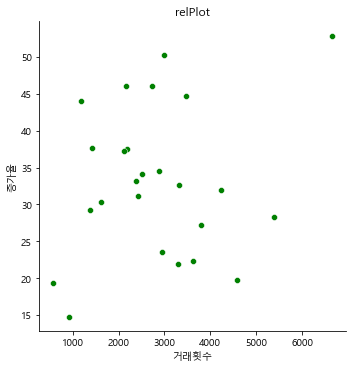

In [62]:
sns.relplot(x = '거래횟수', y = '증가율', data  = find_rel, color='g')
plt.title('relPlot')
plt.show()

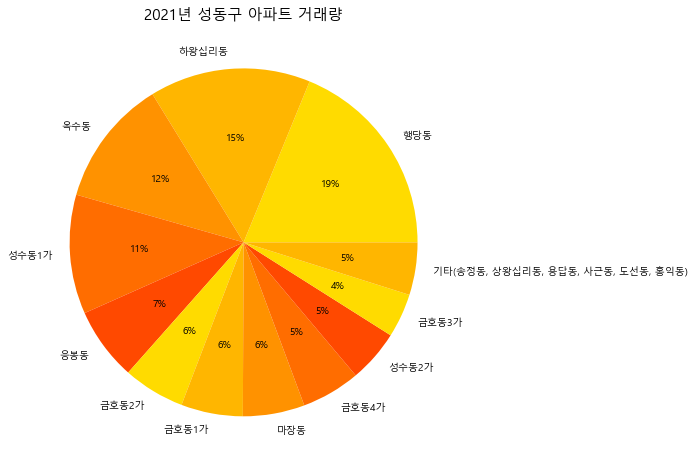

In [63]:
df_ss_count = df.loc[(df['gu'] =='성동구') & (df['거래년도'] == '2021')].groupby(['dong'])['거래금액'].count().reset_index(name='count').sort_values(by='count', ascending = False)
df_ss_count

etc = {'dong':'기타(송정동, 상왕십리동, 용답동, 사근동, 도선동, 홍익동)','count':74}
df_ss_count = df_ss_count.append(etc, ignore_index=True)
df_ss_count

con = df_ss_count['count']<=24
con2 = df_ss_count.loc[con].index

df_ss_count.drop(con2, inplace =True)

fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정

#define Seaborn color palette to use
colors = sns.color_palette('autumn_r')[0:5]

#create pie chart
plt.pie(df_ss_count['count'], labels = df_ss_count['dong'], colors = colors, autopct='%.0f%%')
plt.title('2021년 성동구 아파트 거래량',fontsize=15)
plt.show()

위의 plot을 보면, 거래량과 실거래가 증가율 사이에 선형관계는 나타나지 않는다.  

이는 성동구의 경우를 예로 들어 설명할 수 있는데,  
성동구의 2021년 아파트 거래량 1위는 행당동(19%)인데 반해 거래금액 증가율은 4위에 그쳤고 이는 1위인 성수동1가의 거래금액 증가율과 약 두배가량의 차이를 보인다.  

그러나 노원구의 경우 거래량도 최상위(6658건)이고  
위에서 언급했듯 실거래가 증가율(52.89%)도 이에 비례하여 가장 높은 순위를 차지했다.

따라서, 거래량 1위, 실거래가 증가율 1위의 근거를 데이터를 통해 조금 더 자세히 살펴보고자  
노원구 소속 어느 동에서 실거래가 증가율이 높았는지 알아보았다.

In [64]:
df_n = df.loc[(df['gu'] =='노원구') & (df['거래년도'] == '2021')].groupby(['dong'])['거래금액'].count().reset_index(name='count').sort_values(by='count', ascending = False)
df_n

,dong,count
1,상계동,1609
3,중계동,813
0,공릉동,642
2,월계동,617
4,하계동,292


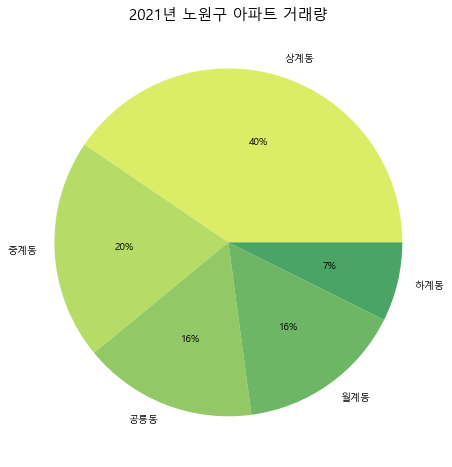

In [65]:
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')

colors = sns.color_palette('summer_r')[0:5]

plt.pie(df_n['count'], labels = df_n['dong'], colors = colors, autopct='%.0f%%')
plt.title('2021년 노원구 아파트 거래량',fontsize=15)
plt.show()

`그래프에서 가장 큰 비율을 차지하는 상계동을 분석해보았다`

In [66]:
cond1 = (df['gu'] == '노원구')
cond2 = (df['dong'] == '상계동')

cond3 = (df['거래년도'] == 2019)
cond4 = (df['거래년도'] == '2021')
nowon_2021 = df.loc[cond1 & cond2 & cond4].groupby('아파트이름').mean()[['거래금액']].sort_values('거래금액', ascending = False).reset_index().head(10)
nowon_2021

,아파트이름,거래금액
0,임광,117000.000000
1,대림,106780.000000
2,포레나노원,100709.090909
3,상계주공14(저층),98000.000000
4,수락산벨리체,96010.000000
5,한양,95000.000000
6,중계센트럴파크,92260.000000
7,수락파크빌,91916.666667
8,노원센트럴푸르지오,90485.000000
9,동양엔파트,90309.090909


In [67]:
nowon_2019 = df.loc[cond1 & cond2 & cond3].groupby('아파트이름').mean()[['거래금액']].sort_values('거래금액', ascending = False).reset_index().head(10)
nowon_2019

,아파트이름,거래금액
0,임광,77208.333333
1,대림,68750.000000
2,동양엔파트,67623.076923
3,수락산벨리체,66830.000000
4,상계주공3(저층),62266.666667
5,수락파크빌,61081.250000
6,노원IPARK,59672.222222
7,중계센트럴파크,58636.842105
8,수락산늘푸른,57917.000000
9,상계주공3(고층),55894.298246


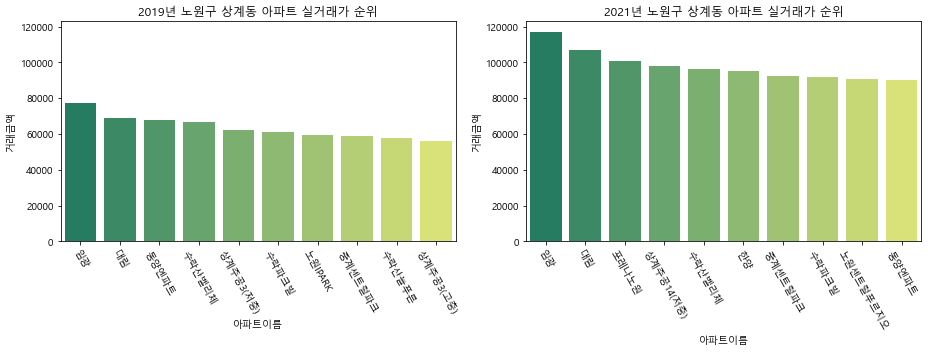

In [68]:
plt.figure(figsize = (13,5))
a = plt.subplot(1,2,2)
plt.xticks(rotation = - 60 )
sns.barplot(x = nowon_2021['아파트이름'], y =nowon_2021['거래금액'],
            palette= 'summer')
plt.title('2021년 노원구 상계동 아파트 실거래가 순위')

plt.subplot(1,2,1, sharey = a)
plt.xticks(rotation = - 60 )
sns.barplot(x = nowon_2019['아파트이름'], y =nowon_2019['거래금액'],
            palette= 'summer')
plt.title('2019년 노원구 상계동 아파트 실거래가 순위')

plt.tight_layout()
plt.show()

1위, 2위는 변함이 없지만 2020년 12월 완공된 포레나노원이 2021년 실거래가 순위 3위를 차지하며  
노원구 실거래가 증가율 상승의 원인이 된 것으로 보인다.

결론)  
본 프로젝트에서는 2019년, 2021년의 서울특별시 아파트 실거래가 상위 5위, 하위 5위 구를 알아보고, 각 그룹에 대한 실거래가 증가율을 살펴보았다.  

상위 5위 그룹의 경우, 2019년 대비 2021년 상위 5위 순위 자체에 변함은 없었다. 그러나, 실거래가 증가율과 관련하여 성동구의 경우 다른 구에 비해 약 50% 이상의 증가율을 보였다.  
하위 5위 그룹의 경우, 2019년에 포함되었던 노원구가 2021년 하위 5위 그룹에서 이탈하였다.  

이에 해당 이슈들의 원인을 살펴보고자 성동구의 동별 실거래가를 살펴보고, 실거래가 1위 동의 아파트별 실거래가를 확인하였다.  
또한 노원구의 경우, 2021년 서울특별시 전체에서 거래량 1위를 차지하였고, 특히 노원구 상계동에서 아파트 실거래가 증가율이 가장 큰 폭으로 상승하였음을 확인하였다.